##Weather is an important factor to consider when deciding where you want to live, since it can have a large impact on people’s wellbeing. In this assignment, you will explore a data set of average monthly climate measurements for six major cities in the USA. The data set can be downloaded here.

##The data set consists of the following attributes (columns):

##city: The name of the city

##lon: The longitude of the city

##month: The measured month, as a string (‘Jan’, ‘Feb’, etc.)

##monthnum: The measured month, as a zero-based integer (0, 1, etc.)

##sunshine: The hours of sunshine per month, averaged over the years 1981 - 2010





We start by importing essential libraries.

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

We import the dataset and observe the type of data in the columns

In [23]:
file1=pd.read_csv('/content/climate.csv')

In [24]:
df=pd.DataFrame(file1)
df.head(5)


,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


### Based upon the above mentioned statement and having a look at the data, The following questions pop up:

### * Is there a correlation between the location (latitude/longitude) and the sunshine received throughout the year?

### * How do cities in different geographical regions (e.g., North vs. South) compare in terms of sunshine hours?

### * Can we compare sunshine hours among multiple cities and see what suits a person in the best way to plan their living.

### * Which city has the most sunshine during each month?

### * What are the peak sunshine months for each city?

### For this, we will try to find any correlation that exists


In [25]:
df.city.unique()

array(['Chicago', 'Houston', 'Miami', 'New York', 'San Francisco',
       'Seattle'], dtype=object)

Describing the data would give the first hand insights.

In [26]:
 df.describe()

,lon,lat,monthnum,sunshine
count,72.000000,72.000000,72.000000,72.000000
mean,-96.981757,37.244306,5.500000,219.861111
std,19.258907,7.460586,3.476278,65.514928
min,-122.446747,25.761681,0.000000,52.000000
25%,-122.335167,29.749907,2.750000,176.250000
50%,-91.490799,39.232202,5.500000,224.000000
75%,-80.191788,41.881832,8.250000,271.250000
max,-73.935242,47.608013,11.000000,330.000000


Describing the data in whole would not make any sense since the average sunshine hours is dependent upon two factors:

* By location
* By Month

Lets Describe a city data as well, for instance, lets take chicago

In [27]:
 df[df.city=='Chicago'].describe()

,lon,lat,monthnum,sunshine
count,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,-8.762318e+01,4.188183e+01,5.500000,208.666667
std,1.484275e-14,7.421377e-15,3.605551,76.656653
min,-8.762318e+01,4.188183e+01,0.000000,106.000000
25%,-8.762318e+01,4.188183e+01,2.750000,135.750000
50%,-8.762318e+01,4.188183e+01,5.500000,204.000000
75%,-8.762318e+01,4.188183e+01,8.250000,281.500000
max,-8.762318e+01,4.188183e+01,11.000000,318.000000


Clearly, The mean of sunshine hours through out the year does not make any sense. Because as we said just now, the data is dependent on two factors that is location and months, and here, we are clearly not able to see the bifurcation of months, but one thing that is relevant here is the minimum and maximum value.

When we talk about the weather, we always talk about the minimum and maximum temperature / condition with a reference to a time frame, like a day, month or a year.

So it will be relevant if we talk about the average sunshine hours tracking the range over the year and then would be able to answer how the Summer and Winters would look like for that particular city

Now that we have Described the data, Lets move further by finding if any correlation exists between the Latitude/longitude combination and their sunshine hours. Therefore, we will try to obtain a scatter plot in subplots for latitude and longitude vs sunshine hours. Hence we would transform our data in such a way that we plot the latitudes and longitudes with on the map with their range

In [28]:
city_min=df.groupby(['city'])['sunshine'].min()
city_max=df.groupby(['city'])['sunshine'].max()

city_min_max=pd.merge(city_max,city_min,on='city').rename(columns={'sunshine_x':'Max_sunshine_hr','sunshine_y':'Min_sunshine_hr'})

city_min_max['Difference']=city_min_max['Max_sunshine_hr']-city_min_max['Min_sunshine_hr']
df['monthnum']=df['monthnum']+1
df=pd.merge(df,city_min_max,on='city',how='left').sort_values(by='Difference')

df['Range'] = df['Min_sunshine_hr'].astype(str) + '-' + df['Max_sunshine_hr'].astype(str)

df['City-Range']=df['city']+': '+df['Range']
df.head()

,city,lon,lat,month,monthnum,sunshine,Max_sunshine_hr,Min_sunshine_hr,Difference,Range,City-Range
35,Miami,-80.191788,25.761681,Dec,12,209,280,209,71,209-280,Miami: 209-280
25,Miami,-80.191788,25.761681,Feb,2,227,280,209,71,209-280,Miami: 209-280
26,Miami,-80.191788,25.761681,Mar,3,266,280,209,71,209-280,Miami: 209-280
27,Miami,-80.191788,25.761681,Apr,4,275,280,209,71,209-280,Miami: 209-280
28,Miami,-80.191788,25.761681,May,5,280,280,209,71,209-280,Miami: 209-280


To find any relation, lets plot the data on the map

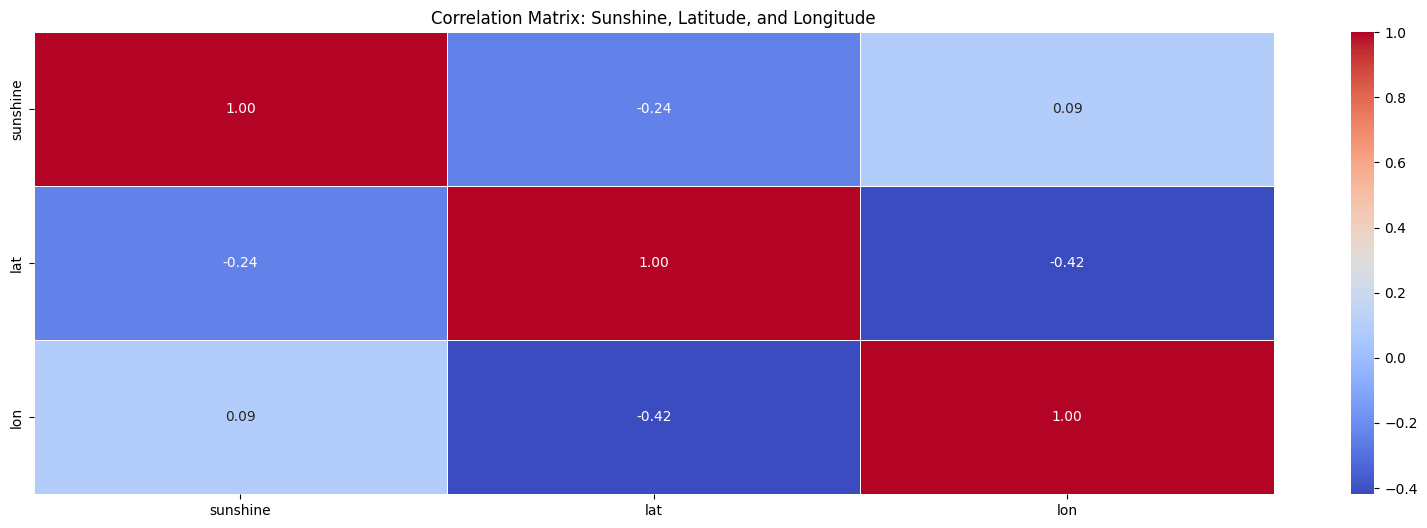

In [29]:

import plotly.express as px

fig = px.scatter_geo(
    df,
    lat='lat',
    lon='lon',
    text='City-Range',
    size='sunshine',
    projection='natural earth',
    title='City Locations with Sunshine Hours',
    color='sunshine',
    color_continuous_scale=px.colors.sequential.Plasma,
)

fig.show()

correlation = df[['sunshine', 'lat', 'lon']].corr()

plt.figure(figsize=(20, 6))
sns.heatmap(correlation,annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix: Sunshine, Latitude, and Longitude")
plt.show()


In the Above graph, We can observe that as we move up north from the equator, the minimum sunshine hours for different cities have different values, however, the maximum sunshine hours for each city is approximately nearby. With this observation, we can say for the cities with greater distance from the equator ( as we move up north ) would observe less sunshine hours for few months than the cities closer to the equator.

Also as the heatmap suggests, Latitude and sunshine have a negative correlation, while the longitude and sunshine have a very slight but positive correlation.


So this Answers our first and second question.

This might give us the reason as to why the sunshine hours would vary. However, we can't really identify how the sunshine hours would vary depending upon the month

To compare a certain High or low among cities, we should also tabulate the percentages as per the maximum and minimum values of max and min sunshine hours.


Now lets Try to plot something which would display the range of sunshine hours per month. For this, something like a scatter plot, Box plot and violin plot will be feasible. we will use a violn plot since it can also help us visualise the months as well.

<ipython-input-30-29477bc67e79>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




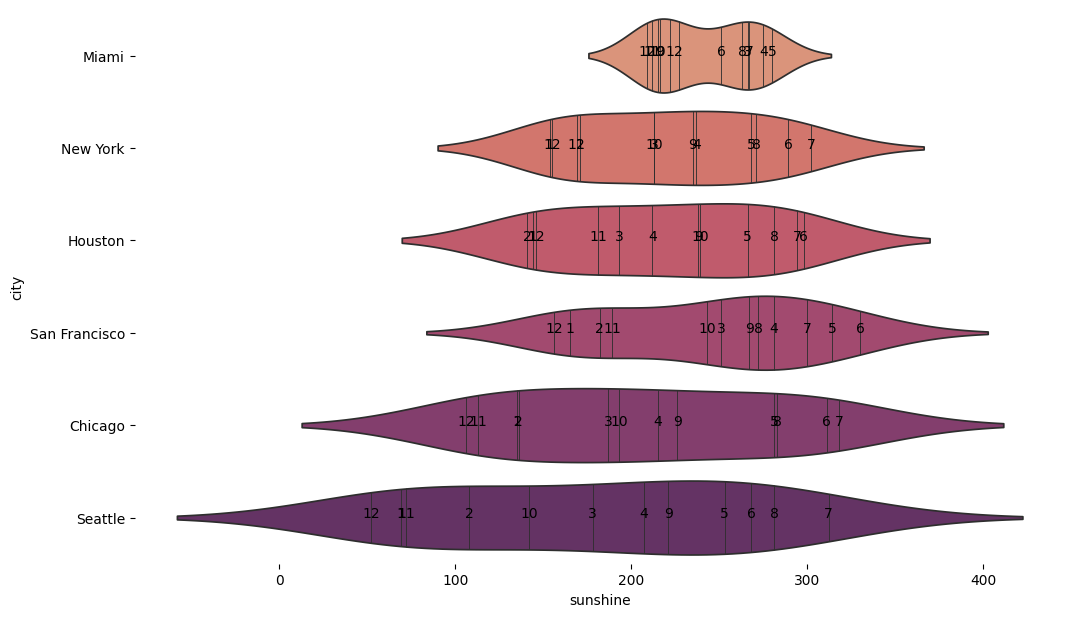

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['city'].unique()))

plt.figure(figsize=figsize)
# plt.grid()
sns.violinplot(df, x='sunshine', y='city', inner='stick', palette='flare')
for i, row in df.iterrows():
    plt.text(x=row['sunshine'], y=row['city'],  s=round(row['monthnum'], 2),
             horizontalalignment='center', size='medium', color='black')

sns.despine(top=True, right=True, bottom=True, left=True)



The violin plot gives a great idea about the spread of sunshine throughout the year. It gives a fair idea about the range of sunshine for each city and the line sticks also reflect the density and patterns for the spread of sunshine across month that each city observes.


But the data values indicating the month number are overlapping. Also, Many questions are still unanswered. Hence this figure is not the ideal choice.

We will have to figure out a better visualisation where we can see sunshine hours distribution with respect to city and month. Therefore we can use the heatmap for the same, for which we would have to pivot our DataFrame.

Heatmap in this case would answer most of our questions related to the dataset.

In [31]:
df.sort_values(by='monthnum',inplace=True)
df_pivot=df.pivot(index='City-Range',columns=['month','monthnum'],values='sunshine')

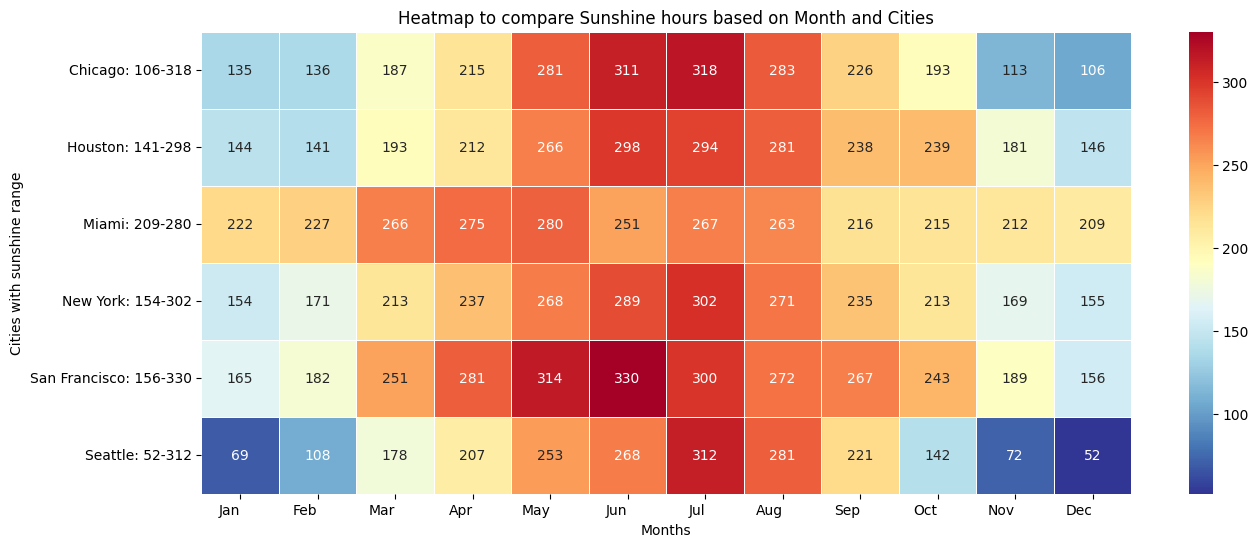

In [32]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(15, 6))


cmap = sns.color_palette("RdYlBu_r", as_cmap=True)
x=sns.heatmap(df_pivot, annot=True,fmt=".0f", cmap=cmap, cbar=True, linewidths=0.5)
x.set_xlabel('Months')
x.set_ylabel('Cities with sunshine range')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x.set_xticklabels(months, ha='right')
plt.title('Heatmap to compare Sunshine hours based on Month and Cities')
plt.show()

From the Above Heat map, we can clearly draw insights about most of the data:

* The color coding given to the graph, transforming from blue to red, represents the more the blue, the colder the place might be due to less sunshine. Similarly, the more red it is, the hotter or high sunshine is felt in that city for that particular month

* From the heat map, on the X-axis we have the month and the Y axis indicating the name of the city with its range of minimum to maximum sunshine hours across different months in a year. From the range, it can be easily identified which city has the max sunshine hours and which city has the minimum sunshine hours without dwelling into heatmap.

* The heatmap is sorted by months and thus gives the trend as how the intensity of sunshine hours vary throughout the year for a particular city.

* The heat map is also the answer for the most important question that came up from the dataset. Can we compare sunshine hours among multiple cities and see what suits a person in the best way to plan their living? The answer is YES!! we just did. For a person to identify the how sunshine would effect his/her living can have a brief idea from the heat map. For example, if a person likes constant weather throughout the year, his ideal choice would be Miami since it has a constant sunshine hours thoughout the year. Similarly, we could also look at the other extremes as well.

* The graph also displays the sunshine hours for every month which would give the idea to a tourist how their upcoming days in that city would look like based upon the weather, specifically the sun.

* Also Which city has the most sunshine during each month can be easily identified from the heat map.

* Similarly, the peak months for each city in terms of their minimum and maximum can be answered again from the heatmap itself. Therefore we can conclude that the heatmap in this case is the most relevant visualisation displaying maximum insights.
